In [1]:
import pandas as pd
import numpy as np

from PIL import Image, ImageStat
import math
from tqdm import tqdm
import time, cv2

import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
from matplotlib import offsetbox
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA


# Set your path(s)

In [2]:
csv_full = r"C:\Users\tyle_\DataScientest\MushPy\reduced_dataset_5_families_Copie.csv"

folder_data = r'C:\Users\tyle_\DataScientest\MushPy\images\2nd try\images_mushroom\\'

### Load csv_full

In [3]:
df = pd.read_csv(csv_full)


folderpath = str(r'C:\Users\tyle_\DataScientest\MushPy\images\2nd try\images_mushroom\\')
df['filepath'] = [folderpath + str(df['image_id'][x]) + ".jpg" for x in range(len(df))]

df = df.sample(n=len(df)//8)   #  if you take a sample higher than 1000, some cells will be very VERY long to run

df.head()

,image_id,image_url,family,filepath,label
8368,316773,http://mushroomobserver.org/images/320/316773,Omphalotaceae,C:\Users\tyle_\DataScientest\MushPy\images\2nd...,1
12379,487921,http://mushroomobserver.org/images/320/487921,Inocybaceae,C:\Users\tyle_\DataScientest\MushPy\images\2nd...,0
5881,217519,http://mushroomobserver.org/images/320/217519,Marasmiaceae,C:\Users\tyle_\DataScientest\MushPy\images\2nd...,4
12501,492296,http://mushroomobserver.org/images/320/492296,Physalacriaceae,C:\Users\tyle_\DataScientest\MushPy\images\2nd...,3
2742,98411,http://mushroomobserver.org/images/320/98411,Marasmiaceae,C:\Users\tyle_\DataScientest\MushPy\images\2nd...,4


### Check the first picture in the dataframe

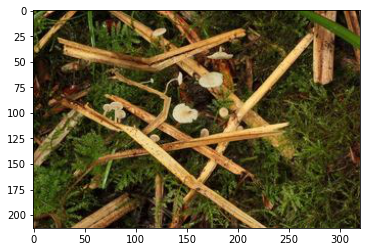

In [4]:
img = Image.open(df['filepath'].iloc[0]) # load the picture
aimg = np.asarray(img)                   # transform the picture in an array

plt.imshow(aimg);                        # show the picture

### Split data :

In [5]:
X_train_path, X_test_path, y_train, y_test = train_test_split(df['filepath'], df['label'], test_size=0.2, random_state=1234)

In [6]:
size = 128         # set the size of the pictures here

### Load X_test images :

In [7]:
# some images in the dataset were with different charateristics than the majority of the other ones
# I decided to separate them from the other ones as it was only drawings which were not part of our study

imgBW = []         # create a list for images black & white
y_testBW = []      # create a list for y_test with images black & white
y_test = []        # create a list for y_test with images in colors
X_test = []        # create a list for X_test with images in colors

i=0                # counter initialization

for filepath in tqdm(X_test_path):       # this loop separate B&W images from the other ones and load our images + transform them by resizing and removing the colors from the pictures 
    
    img = Image.open(filepath)           # load picture
    img_test_RGB = img.getcolors()       # => check if there are colors or not on the picture
    
    if img_test_RGB != None:             # separate  B&W pictures & transform + add them in a list (only drawings out of our study)
        img = img.resize((size, size), Image.ANTIALIAS)
        imgBW.append(img)
        y_testBW.append(df['label'].iloc[i])
        i += 1
        
    else:                                # transform & add pictures them in a list (only drawings out of our study)
        img = img.resize((size, size), Image.ANTIALIAS)
        aimg = np.asarray(img)
        R, G, B = aimg[:,:,0], aimg[:,:,1], aimg[:,:,2]
        imggray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        imggray_0, imggray_1 = imggray.shape
        D1_imggray = imggray.reshape([imggray_0*imggray_1])
        X_test.append(D1_imggray)
        y_test.append(df['label'].iloc[i])
        i += 1

X_test = np.asarray(X_test)              # transform X_test from list to np.array
y_test = np.asarray(y_test)              # transform y_test from list to np.array

100%|██████████| 429/429 [00:03<00:00, 139.17it/s]


### Load X_train images :

In [8]:
# Same thing than previously, some images in the dataset were with different charateristics than the majority of the other ones
# I decided to separate them from the other ones as it was only drawings which were not part of our study


imgBW = []         # create a list for images black & white
y_trainBW = []      # create a list for y_train with images black & white
y_train = []        # create a list for y_train with images in colors
X_train = []        # create a list for X_train with images in colors

i=0                # counter initialization

for filepath in tqdm(X_train_path):    # this loop separate B&W images from the other ones and load our images + transform them by resizing and removing the colors from the pictures 
    
    img = Image.open(filepath)         # load picture
    img_test_RGB = img.getcolors()     # => check if there are colors or not on the picture
    
    if img_test_RGB != None:           # separate  B&W pictures & transform + add them in a list (only drawings out of our study)
        img = img.resize((size, size), Image.ANTIALIAS)
        imgBW.append(img)
        y_trainBW.append(df['label'].iloc[i])
        i += 1
    else:                              # transform & add pictures them in a list (only drawings out of our study)
        img = img.resize((size, size), Image.ANTIALIAS)
        aimg = np.asarray(img)
        R, G, B = aimg[:,:,0], aimg[:,:,1], aimg[:,:,2]
        imggray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        imggray_0, imggray_1 = imggray.shape
        D1_imggray = imggray.reshape([imggray_0*imggray_1])
        X_train.append(D1_imggray)
        y_train.append(df['label'].iloc[i])
        i += 1

#X_train = np.concatenate(X_train, axis=0)

X_train = np.asarray(X_train)          # transform X_train from list to np.array
y_train = np.asarray(y_train)          # transform y_train from list to np.array

100%|██████████| 1713/1713 [00:11<00:00, 151.80it/s]


### Check the first picture from X_train

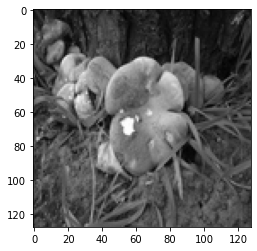

In [9]:
plt.imshow(X_train[0].reshape([size,size]), cmap='gray');

### Let's have a look about few pictures of our dataset

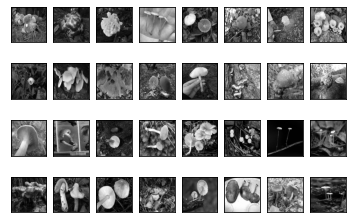

In [10]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i].reshape(size,size), cmap='gray')

### Let's define a function which will allow us to visualize the pictures in our dataset on a two-dimensional graph

In [11]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap=plt.cm.Spectral )
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # On ne montre pas le points trop proches
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Let's use **`Isomap`** to identify variance factors of the mushrooms.

The cell below can be very long to run if the dataset is higher than 1000 items in it

Cell execution time :00:01:36.28


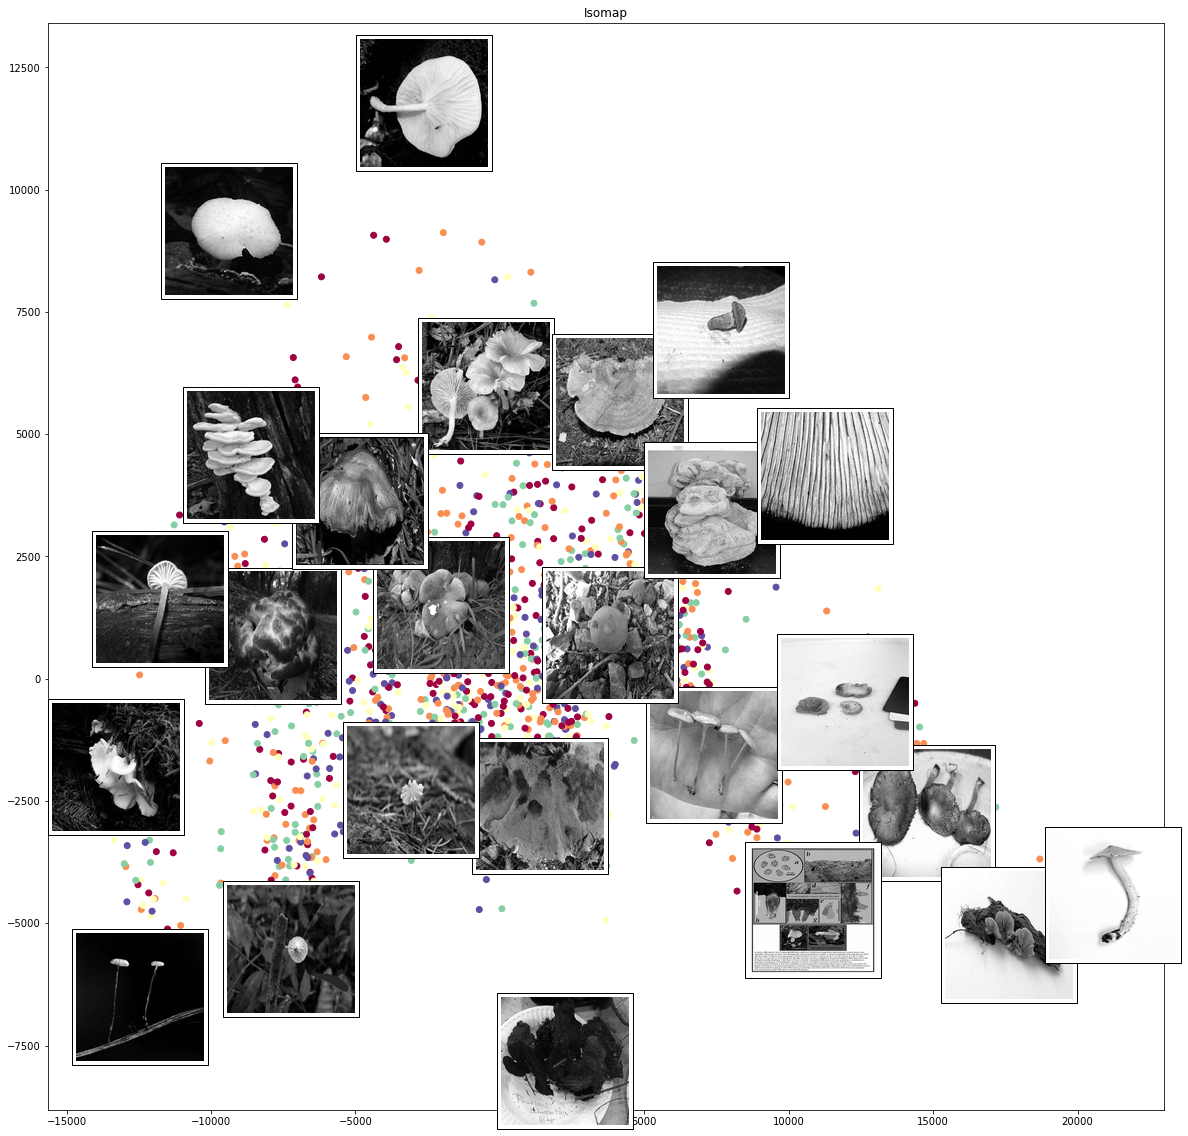

In [37]:
start = time.time()


fig, ax = plt.subplots(figsize=(20, 20))

plt.title("Isomap")
plot_components(X_train,
                model=Isomap(n_neighbors=100,n_components=2),
                images=X_train.reshape((-1, size, size)),
                cmap = 'gray',
                thumb_frac = .1)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Cell execution time :{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

### We can notice from the Isomap that on the **`left side, pictures are darker`** and more we go to **`the right side and brighter`** they become

### Let's use **`PCA`** to identify variance factors of the mushrooms.

The cell below can be very long to run if the dataset is higher than 1000 items in it

Cell execution time :00:00:00.95


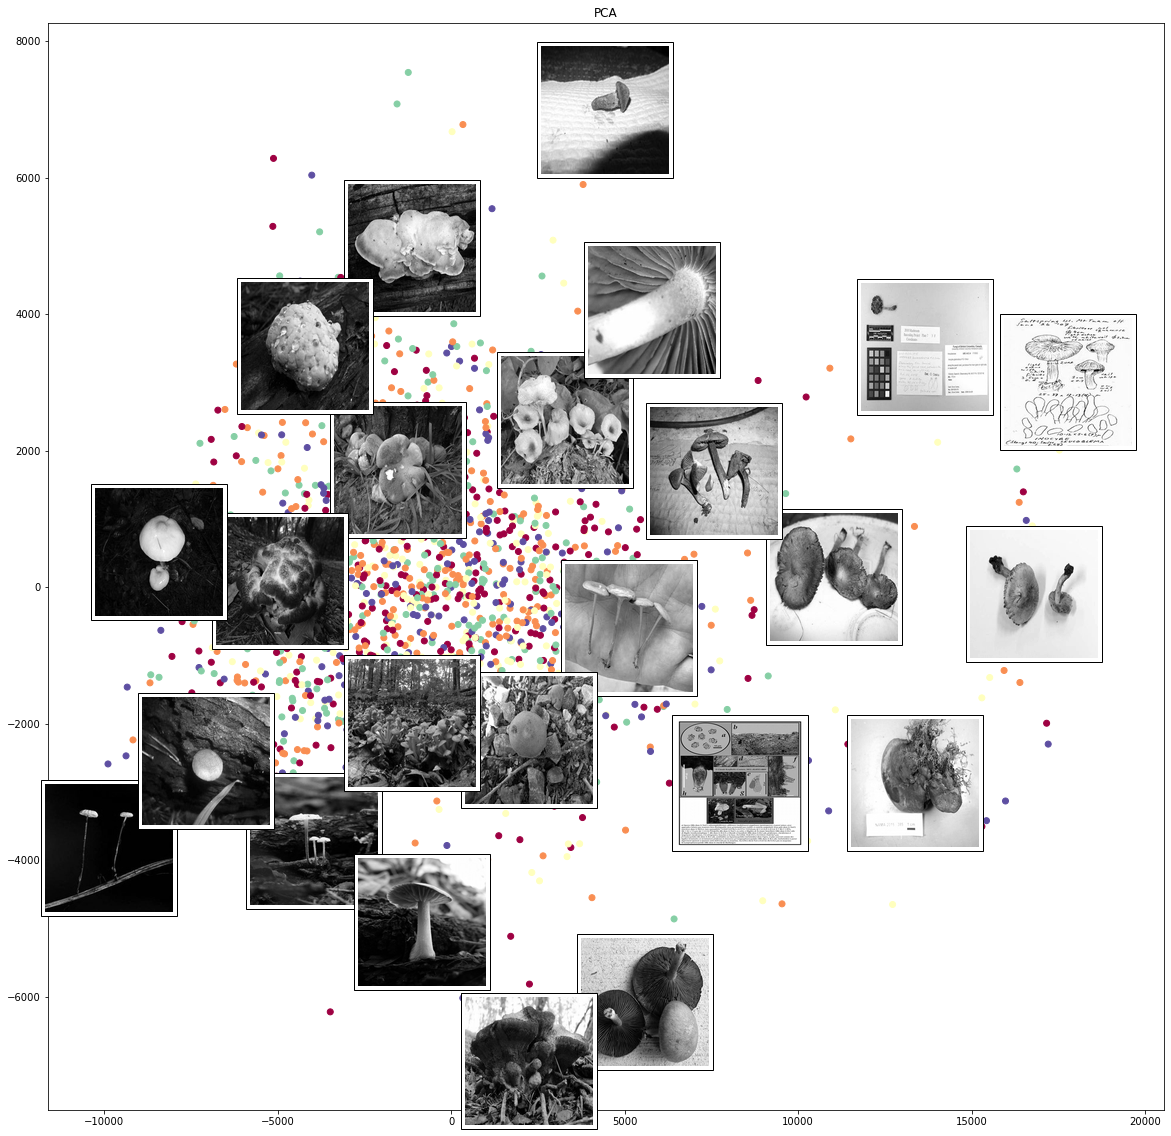

In [38]:
start = time.time()


fig, ax = plt.subplots(figsize=(20, 20))

plt.title("PCA")
plot_components(X_train,
                model=PCA(n_components=2),
                images=X_train.reshape((-1, size, size)),
                cmap = 'gray',
                thumb_frac = .1)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Cell execution time :{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

### We can notice from the PCA that on the **`left side, pictures are darker`** and more we go to **`the right side and brighter`** they become

### Let's see how the explained variance ratio evolves with the PCA

In [24]:
pca = PCA()
pca.fit(X_train)

PCA()

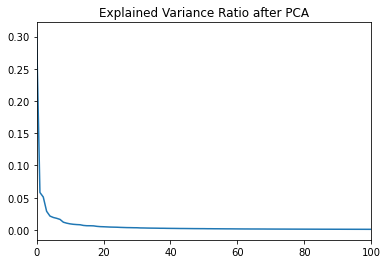

In [36]:
plt.figure()
plt.title("Explained Variance Ratio after PCA")
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);


### We can see that the explained variance is very high on the very first principal components

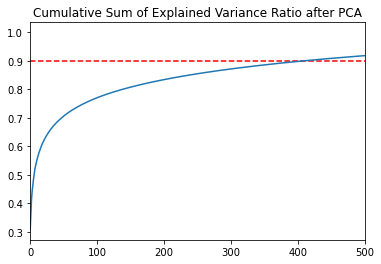

In [32]:
plt.figure()
plt.title("Cumulative Sum of Explained Variance Ratio after PCA")
plt.xlim(0,500)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

### We can see that we need around 400 principal components to obtain 90% of the explained variance 

### Let's reduce the dimensions of our dataset by deleting the less informative pixels.
In this way, our model won't be trained on useless pixels

Cell execution time :00:00:01.14


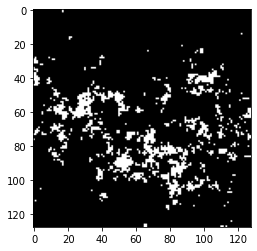

In [15]:
start = time.time()

sel = SelectPercentile(percentile = 90)
sel.fit(X_train, y_train)

X_train_red = sel.transform(X_train)
X_test_red = sel.transform(X_test)


plt.imshow(sel.get_support().reshape(size,size), cmap = 'gray_r');

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Cell execution time :{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

The less informative pixels are in white on the pictures. There is no conclusion, is **the less informative pixels are a bit everywhere on the pictures**.

### Let's define a function `plot_reduced_image` to show a picture from which we withdraw some pixels by specifying the reduced data and the selector to use in order to recollect the mask


In [16]:
def plot_reduced_image(image, selector):
    mask = selector.get_support()
    #toprint = [image[i] if mask[i] == True else 0 for i in range(sum(mask))]
    fullimg = np.array([])
    cnt = 0
    for i in range(size*size):
        if mask[i]:
            fullimg = np.append(fullimg, image[i-cnt])
        else:
            fullimg = np.append(fullimg, 0)
            cnt += 1
    plt.imshow(fullimg.reshape(size,size), cmap = 'gray')

### Let's see the result of our new function with the first picture of our dataset 

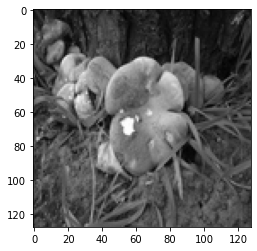

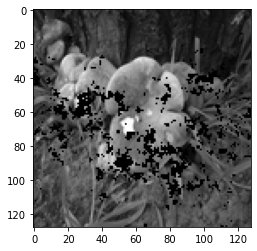

In [17]:
plt.figure()
plt.imshow(X_train[0].reshape(size,size), cmap = 'gray')
plt.show();
plot_reduced_image(X_train_red[0], sel)

### we can still easily recognize the mushroom.

### Let's now apply a PCA on the reduced images

The cell below can be very long to run if the dataset is higher than 1000 items in it

In [18]:
start = time.time()

pca = PCA(n_components = .9)
X_train_pca = pca.fit_transform(X_train_red)
X_test_pca = pca.transform(X_test_red)

print("New dimensions of our dataset after PCA :",pca.n_components_)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Cell execution time :{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

New dimensions of our dataset after PCA : 402
Cell execution time :00:00:25.25


In [19]:
X_train_samples, X_train_dimensions  = X_train.shape
print("Our dataset is now with", pca.n_components_,"dimensions, instead of", X_train_dimensions," ( size =",size,")")

Our dataset is now with 402 dimensions, instead of 16384  ( size = 128 )


Let's see the 'eigenfaces' which are the first main components of the PCA bringing the most variance

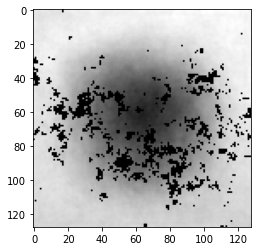

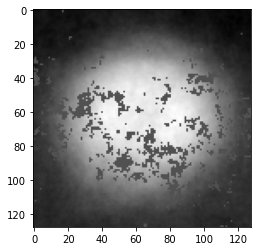

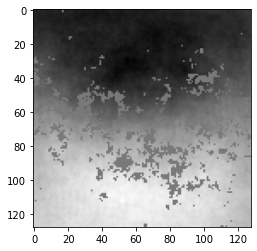

In [20]:
for i in range(3):
    plt.figure()
    plot_reduced_image(pca.components_[i], sel)
    plt.show();

### Not so sure that there is anything left from the mushroom...